In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.precision',10)

In [842]:
df = pd.read_csv("dataset/final_dataset.csv")

### Feature Engineering

In [5]:
df["Total_Invested"] = df.groupby("Customer_ID")["Amount_invested_monthly"].cumsum()


df["Total_Debt"] = df.groupby("Customer_ID")["Outstanding_Debt"].cumsum()

df["Monthly_Expenses"] = df["Total_EMI_per_month"] + df["Amount_invested_monthly"]

df["Total_Loan_Applied"] = df.groupby('Customer_ID')['Num_of_Loan'].cumsum()

### Drop Identifier Columns

In [7]:
df = df.drop(columns=["Unnamed: 0","Month","ID","Customer_ID","Name","SSN"])

### Move Credit Score Column

In [9]:
df["Credit_Score_Temp"] = df["Credit_Score"]
df = df.drop(columns=["Credit_Score"])
df = df.rename(columns={"Credit_Score_Temp":"Credit_Score"})

### Normalize / Scale Numerical Feature

In [11]:
from sklearn.preprocessing import StandardScaler

numeric_features = ["Age","Annual_Income","Monthly_Inhand_Salary",
                    "Num_Bank_Accounts","Num_Credit_Card","Interest_Rate",
                    "Num_of_Loan","Delay_from_due_date",
                   "Num_of_Delayed_Payment","Changed_Credit_Limit","Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio",
                   "Credit_History_Age","Total_EMI_per_month","Amount_invested_monthly",
                   "Monthly_Balance","Total_Debt","Total_Invested","Monthly_Expenses","Total_Loan_Applied"]


sc = StandardScaler()
df[numeric_features] = sc.fit_transform(df[numeric_features])

### Encode Categorical Features

In [13]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()

df_label_encoded = df.copy()
feature_label_encoded = ["Occupation"]




le = preprocessing.LabelEncoder()
df_label_encoded["Occupation"] = le.fit_transform(df_label_encoded["Occupation"])

# Target Encoding
credit_mix_label = {"Good":2, "Standard":1, "Bad":0}
payment_min_amount_label = {"Yes":1, "No": 0, "NM":0}
credit_score_label = {"Good":2, "Standard":1, "Poor":0}
spending_level_label = {"High":1,"Low":0}
transaction_value_label = {"Large":2,"Medium":1,"Small":0}


label_maps = {
    "Credit_Mix": credit_mix_label,
    "Payment_of_Min_Amount": payment_min_amount_label,
    "Credit_Score": credit_score_label,    
    "Spending_Level":spending_level_label,
    "Transaction_Value":transaction_value_label
}

for feature,label in label_maps.items():
    df_label_encoded[feature] = df_label_encoded[feature].map(label)

### Correlation to Target Column

In [15]:
spearman_corr = df_label_encoded.corr(method='spearman')['Credit_Score'].drop('Credit_Score')
pearson_corr = df_label_encoded.corr(method='pearson')['Credit_Score'].drop('Credit_Score')

from sklearn.feature_selection import mutual_info_classif

# Separate features and target
X = df_label_encoded.drop(columns=['Credit_Score'])
y = df_label_encoded['Credit_Score']



categorical_feature = ["Occupation","Payment_Behaviour","Credit_Mix","Payment_of_Min_Amount","Student_Loan","Debt Consolidation Loan"
                       ,"Auto Loan","Credit-Builder Loan","Not Specified","Home Equity Loan","Personal Loan","Payday Loan","Mortgage Loan"
                       ,"No Data","unem_category","in_category","cci_category"]

discrete_mask = X.columns.isin(categorical_feature)

# Ensure all features are numeric or encoded (use LabelEncoder or OneHotEncoder beforehand if needed)
# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_mask, random_state=42)


mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

combined = pd.DataFrame({
    'Spearman': spearman_corr,
    'Pearson': pearson_corr,
    'Mutual_Info': mi_df
}).sort_values(by='Spearman', ascending=False)

In [16]:
combined.sort_values(by="Mutual_Info",ascending=False)

Spearman       Pearson   Mutual_Info
Monthly_Inhand_Salary     0.2035658595  0.2098738515  0.6224891483
Annual_Income             0.2072457876  0.2125695362  0.6186243530
Outstanding_Debt         -0.4338475782 -0.3865247385  0.6122904135
Total_EMI_per_month      -0.0942135661 -0.0075822586  0.5666642204
Credit_Mix                0.4902694628  0.4986727905  0.1876566050
Interest_Rate            -0.4815601939 -0.4854086307  0.1732337890
Delay_from_due_date      -0.4378972694 -0.4315913949  0.1207585480
Num_Credit_Inquiries     -0.4384432291 -0.4355805440  0.1173878220
Num_Credit_Card          -0.3858786065 -0.4044211998  0.1112885985
Num_Bank_Accounts        -0.3867521363 -0.3881644801  0.1055310768
Credit_History_Age        0.3974247878  0.3887860109  0.1028360100
Changed_Credit_Limit     -0.1570526545 -0.1694549852  0.0982081549
Payment_of_Min_Amount    -0.3759214643 -0.3840881034  0.0928837162
Num_of_Delayed_Payment   -0.3647710606 -0.3727627646  0.0881029301
Total_Debt               -0.3192556122 -0.2840020852  0.0696282472
Num_of_Loan              -0.3255788815 -0.3233352130  0.0622382249
Monthly_Balance           0.2277840507  0.2075202540  0.0342262760
Total_Loan_Applied       -0.2274279066 -0.2205028771  0.0333001467
Age                       0.1497487190  0.1603559215  0.0270246221
Monthly_Expenses          0.0624037171  0.1139041328  0.0183461683
Amount_invested_monthly   0.1286074847  0.1561097010  0.0179521445
No Data                   0.1577796284  0.1575896216  0.0133195516
Auto Loan                -0.1517296852 -0.1511718724  0.0116109669
Student Loan             -0.1403319694 -0.1393904662  0.0115846394
Personal Loan            -0.1427210725 -0.1428266088  0.0103760960
Payday Loan              -0.1425189855 -0.1420311594  0.0102305283
Credit-Builder Loan      -0.1420354842 -0.1414965869  0.0101582299
Mortgage Loan            -0.1418708507 -0.1411156361  0.0101342414
Debt Consolidation Loan  -0.1404938727 -0.1403829492  0.0099943839
Total_Invested            0.1413829166  0.1408115980  0.0098745733
Home Equity Loan         -0.1367000067 -0.1363284872  0.0094139762
Not Specified            -0.1362143429 -0.1351340979  0.0093797969
Spending_Level            0.0982450854  0.0979668992  0.0092211367
Transaction_Value         0.0928637156  0.0921242721  0.0051345533
Occupation               -0.0093049054 -0.0095492466  0.0009226599
unem_category             0.0073035734  0.0095958331  0.0006644054
in_category              -0.0035360793 -0.0049748289  0.0003338188
cci_category             -0.0020876412 -0.0014883950  0.0002994794
Credit_Utilization_Ratio  0.0421616986  0.0457928673  0.0000000000

In [17]:
combined.to_csv("corr.csv")

### Base Model

In [19]:
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy.special import softmax
import pandas as pd

# Features and target
X = df_label_encoded.drop("Credit_Score", axis=1)
y = df_label_encoded["Credit_Score"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define models
base_models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=5000,random_state=42)),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Evaluate each model
results = []

for name, model in base_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    results.append({
        "Model": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })

# Final results DataFrame
results_df = pd.DataFrame(results)
results_df

Model     Precision    Avg-Recall  Recall Class 0  \
0                  KNN  0.6915612519  0.6630452951    0.6963269529   
1  Logistic Regression  0.6363989823  0.6148563906    0.5204345577   
2        Decision Tree  0.7021846690  0.6981517165    0.6868425591   
3          Naive Bayes  0.6195785932  0.6796561372    0.7323676496   

       F1-Score  Accuracy   AUC (Macro)  Training Time  
0  0.6742561600   0.70995  0.8545715296   0.0074980259  
1  0.6216886203   0.65400  0.8166652011   1.9261238575  
2  0.7001217102   0.71740  0.7679562663   1.5613901615  
3  0.6073728153   0.60810  0.7692852464   0.0229799747

In [20]:
results_df = pd.DataFrame(results)
results_df.to_csv("model_results/pre_tuned/base_model_results.csv")
results_df

Model     Precision    Avg-Recall  Recall Class 0  \
0                  KNN  0.6915612519  0.6630452951    0.6963269529   
1  Logistic Regression  0.6363989823  0.6148563906    0.5204345577   
2        Decision Tree  0.7021846690  0.6981517165    0.6868425591   
3          Naive Bayes  0.6195785932  0.6796561372    0.7323676496   

       F1-Score  Accuracy   AUC (Macro)  Training Time  
0  0.6742561600   0.70995  0.8545715296   0.0074980259  
1  0.6216886203   0.65400  0.8166652011   1.9261238575  
2  0.7001217102   0.71740  0.7679562663   1.5613901615  
3  0.6073728153   0.60810  0.7692852464   0.0229799747

### Ensemble Models

#### Voting

In [23]:
from sklearn.ensemble import VotingClassifier

voting_result = []
voting_types = ["soft","hard"]
for voting_type in voting_types:
    voting_model = VotingClassifier(
        estimators=[(name, model) for name, model in base_models.items()],
        voting=voting_type
    )
    start_time = time.time()
    voting_model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = voting_model.predict(X_test)
    
    if voting_type == "soft":
        y_proba = voting_model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class="ovr")
    else:
        auc_score = None  # hard voting doesn't support probabilities

    voting_result.append({
    "Model": f"{voting_type.capitalize()} Voting Classifier",
    "Precision": precision_score(y_test, y_pred, average="macro"),
    "Avg-Recall": recall_score(y_test, y_pred, average="macro"),
    "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
    "F1-Score": f1_score(y_test, y_pred, average="macro"),
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC (Macro)": auc_score,
    "Training Time": end_time - start_time
})

In [24]:
top_3_base_models = base_models.copy()
top_3_base_models.pop("Logistic Regression")
for voting_type in voting_types:
    top_3_model = {
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Naive Bayes": GaussianNB()
    }
    voting_model = VotingClassifier(
        estimators=[(name, model) for name, model in top_3_base_models.items()],
        voting=voting_type
    )
    start_time = time.time()
    voting_model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = voting_model.predict(X_test)
    
    if voting_type == "soft":
        y_proba = voting_model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class="ovr")
    else:
        auc_score = None  # hard voting doesn't support probabilities

    voting_result.append({
    "Model": f"{voting_type.capitalize()} Voting Classifier with 3 Base Model",
    "Precision": precision_score(y_test, y_pred, average="macro"),
    "Avg-Recall": recall_score(y_test, y_pred, average="macro"),
    "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
    "F1-Score": f1_score(y_test, y_pred, average="macro"),
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC (Macro)": auc_score,
    "Training Time": end_time - start_time
})

In [25]:
voting_results_df = pd.DataFrame(voting_result)
voting_results_df.to_csv("model_results/pre_tuned/voting_results.csv")
voting_results_df

Model     Precision    Avg-Recall  \
0                    Soft Voting Classifier  0.7096077708  0.7414852207   
1                    Hard Voting Classifier  0.7066834420  0.7146678733   
2  Soft Voting Classifier with 3 Base Model  0.7229492883  0.7539147732   
3  Hard Voting Classifier with 3 Base Model  0.7202460467  0.7487363858   

   Recall Class 0      F1-Score  Accuracy   AUC (Macro)  Training Time  
0    0.7318503190  0.7212283474   0.73580  0.8829588708   3.7835650444  
1    0.7825487153  0.7092094083   0.72685           NaN   3.1705029011  
2    0.7677185722  0.7351828375   0.74755  0.8824958135   1.5810668468  
3    0.7999655113  0.7310864487   0.74180           NaN   1.5609240532

#### Bagging

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

bagging_models = {"Random Forest": RandomForestClassifier(random_state=42),
                 "Bagging Classifier": BaggingClassifier(random_state=42),
                 "Extra Trees": ExtraTreesClassifier(random_state=42)}

bagging_result = []

for name,model in bagging_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()


    y_pred = model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)

    # Calculate metrics
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    bagging_result.append({
        "Model": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })

In [790]:
for name,model in bagging_models.items():
    print(name, model.get_params())
    print()

Random Forest {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Bagging Classifier {'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Extra Trees {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 

In [28]:
bagging_results_df = pd.DataFrame(bagging_result)
bagging_results_df.to_csv("model_results/pre_tuned/bagging_results.csv")
bagging_results_df

Model     Precision    Avg-Recall  Recall Class 0  \
0       Random Forest  0.8092772211  0.8090100424    0.8308329022   
1  Bagging Classifier  0.7840294153  0.7752467913    0.8223831695   
2         Extra Trees  0.8220019913  0.8214039874    0.8449732713   

       F1-Score  Accuracy   AUC (Macro)  Training Time  
0  0.8090145713   0.81790  0.9294110795  16.0278279781  
1  0.7787917582   0.79215  0.9078037719   9.9004049301  
2  0.8215608725   0.82890  0.9358698066   5.8621220589

#### Boosting

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

boosting_models = {
    "AdaBoost": AdaBoostClassifier(random_state=42,algorithm='SAMME',estimator=DecisionTreeClassifier(random_state=42)),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

boosting_result = []

for name,model in boosting_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()


    y_pred = model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)

    # Calculate metrics
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    boosting_result.append({
        "Model": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3451
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 39
[LightGBM] [Info] Start training from score -1.237917
[LightGBM] [Info] Start training from score -0.631605
[LightGBM] [Info] Start training from score -1.724428


In [31]:
boosting_results_df = pd.DataFrame(boosting_result)
boosting_results_df.to_csv("model_results/pre_tuned/boosting_results.csv")
boosting_results_df

Model     Precision    Avg-Recall  Recall Class 0      F1-Score  \
0  AdaBoost  0.6996877646  0.6948285757    0.6863252285  0.6971916026   
1   XGBoost  0.7551594537  0.7569729226    0.7434040352  0.7558981519   
2  LightGBM  0.7280858418  0.7342193035    0.7002931540  0.7300041575   

   Accuracy   AUC (Macro)  Training Time  
0    0.7149  0.7573454520   1.5934262276  
1    0.7704  0.9073891223   0.5813298225  
2    0.7475  0.8934593641   0.6691920757

In [798]:
for name,model in bagging_models.items():
    print(name, model.get_params())
    print()

Random Forest {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Bagging Classifier {'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Extra Trees {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 

#### Stacking

In [33]:
from sklearn.ensemble import StackingClassifier

meta_learners = [("KNN",KNeighborsClassifier()),
                ("Decision Tree",DecisionTreeClassifier(random_state=42)),
                ("Naive Bayes", GaussianNB())]

for name,model in bagging_models.items():
    meta_learners.append((name,model))

for name,model in boosting_models.items():
    meta_learners.append((name,model))

stacking_result = []
for name,meta_learner in meta_learners:
    stacking_model = StackingClassifier(
        estimators=[(base_name,base_model) for base_name,base_model in base_models.items()],
        final_estimator=meta_learner,cv=2,
        stack_method="auto"
    )
    
    start_time = time.time()
    stacking_model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = stacking_model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(stacking_model, "predict_proba"):
        y_proba = stacking_model.predict_proba(X_test)
    else:
        y_score = stacking_model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)
 
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    print(name, "Done")
    stacking_result.append({
        "Meta_Learner": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })
    

KNN Done
Decision Tree Done
Naive Bayes Done
Random Forest Done
Bagging Classifier Done
Extra Trees Done
AdaBoost Done
XGBoost Done
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 12
[LightGBM] [Info] Start training from score -1.237917
[LightGBM] [Info] Start training from score -0.631605
[LightGBM] [Info] Start training from score -1.724428
LightGBM Done


In [34]:
stacking_results_df = pd.DataFrame(stacking_result)
stacking_results_df.to_csv("model_results/pre_tuned/stacking_results.csv")
stacking_results_df

Meta_Learner     Precision    Avg-Recall  Recall Class 0  \
0                 KNN  0.7016156952  0.6889995080    0.7166752888   
1       Decision Tree  0.6144388327  0.6128191330    0.6207966891   
2         Naive Bayes  0.6890917053  0.7480178750    0.7735816520   
3       Random Forest  0.7263250388  0.7242630534    0.7390929471   
4  Bagging Classifier  0.7043764449  0.6959926126    0.7394378341   
5         Extra Trees  0.7106145295  0.7069266500    0.7244352475   
6            AdaBoost  0.6157468971  0.6156060003    0.6180375927   
7             XGBoost  0.7505772164  0.7531739529    0.7720296603   
8            LightGBM  0.7507071137  0.7547109914    0.7759958614   

       F1-Score  Accuracy   AUC (Macro)  Training Time  
0  0.6944405716   0.71650  0.8439214219   8.1799438000  
1  0.6136036476   0.64135  0.7046780052   8.1718499660  
2  0.7004532928   0.70590  0.8761551922   7.5514440536  
3  0.7252708374   0.74305  0.8790922513  18.4112000465  
4  0.6994461961   0.72235  0.8564050998  11.3828420639  
5  0.7087009233   0.72885  0.8692490412  11.6035549641  
6  0.6156712543   0.64230  0.7000897062  10.0830519199  
7  0.7517846491   0.76505  0.8954802453   9.5570957661  
8  0.7525825138   0.76575  0.8973966016  10.1449398994

In [35]:
stacking_3_estimator_result = []

for name,meta_learner in meta_learners:
    stacking_model = StackingClassifier(
        estimators=[(base_name,base_model) for base_name,base_model in top_3_base_models.items()],
        final_estimator=meta_learner,cv=2,
        stack_method="auto"
    )
    
    start_time = time.time()
    stacking_model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = stacking_model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(stacking_model, "predict_proba"):
        y_proba = stacking_model.predict_proba(X_test)
    else:
        y_score = stacking_model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)
 
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    print(name, "Done")
    stacking_3_estimator_result.append({
        "Meta_Learner": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })
    

KNN Done
Decision Tree Done
Naive Bayes Done
Random Forest Done
Bagging Classifier Done
Extra Trees Done
AdaBoost Done
XGBoost Done
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Info] Start training from score -1.237917
[LightGBM] [Info] Start training from score -0.631605
[LightGBM] [Info] Start training from score -1.724428
LightGBM Done


In [36]:
stacking_3_estimator_results_df = pd.DataFrame(stacking_3_estimator_result)
stacking_3_estimator_results_df.to_csv("model_results/pre_tuned/stacking_3_estimator_results.csv")
stacking_3_estimator_results_df

Meta_Learner     Precision    Avg-Recall  Recall Class 0  \
0                 KNN  0.6970844271  0.6829598272    0.7185721676   
1       Decision Tree  0.6257765206  0.6275022694    0.6504569753   
2         Naive Bayes  0.7030681591  0.7570540633    0.8075530264   
3       Random Forest  0.6799270117  0.6723015996    0.6604586998   
4  Bagging Classifier  0.6654208992  0.6549583779    0.6645973444   
5         Extra Trees  0.6534683180  0.6478736715    0.6378685980   
6            AdaBoost  0.6351668310  0.6371155832    0.6373512675   
7             XGBoost  0.7470835742  0.7456900474    0.7711674427   
8            LightGBM  0.7491112681  0.7482237454    0.7730643214   

       F1-Score  Accuracy   AUC (Macro)  Training Time  
0  0.6888892816   0.71275  0.8413633010   4.6148619652  
1  0.6265430239   0.65215  0.7197947922   5.2515318394  
2  0.7178891016   0.72340  0.8784832705   4.5473270416  
3  0.6759160755   0.69850  0.8532843715  12.2653670311  
4  0.6597431455   0.68470  0.8261461080   6.4948921204  
5  0.6505526456   0.67550  0.8142620773   8.2358012199  
6  0.6361232828   0.65995  0.7730903024  22.5533950329  
7  0.7462413812   0.76115  0.8925310297   4.8485710621  
8  0.7485387102   0.76285  0.8947640161   4.9638011456

### Hyperparameter Tuning Base Model 

In [38]:
from sklearn.metrics import precision_score, make_scorer

tuned_base_models = {
    "KNN":KNeighborsClassifier(),
    "Logistic Regression":OneVsRestClassifier(LogisticRegression(max_iter=5000,random_state=42)),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Naive Bayes":GaussianNB()
}

param_grid = {
    "KNN":{
        "n_neighbors": [3, 5, 7, 11],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan","minkowski"]
    },
    "Logistic Regression":[
        {
            "estimator__penalty": ["l2"],
            "estimator__C": [0.01, 0.1, 1, 10, 100],
            "estimator__solver": ["lbfgs"]
            },
            {
            "estimator__penalty": ["l1"],
            "estimator__C": [0.01, 0.1, 1, 10, 100],
            "estimator__solver": ["liblinear", "saga"]
        },
        {
            "estimator__penalty": ["elasticnet"],
            "estimator__C": [0.01, 0.1, 1],
            "estimator__solver": ["saga"],
            "estimator__l1_ratio": [0.0, 0.5, 1.0]
        },
    ],
    "Decision Tree":{
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Naive Bayes":{
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
    }
}

def recall_class_0(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[0], average="macro")

recall_scorer = make_scorer(recall_class_0)

for name,model in base_models.items():
    print(f"{name}:")

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid[name],
        scoring=recall_scorer, 
        cv=4,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    # Model terbaik
    
    print(f"Best {name} params:", grid.best_params_)
    print("Best Recall-0 (Poor):", grid.best_score_)
    print()
    
    tuned_base_models[name] = tuned_base_models[name].set_params(**grid.best_params_)

KNN:
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best KNN params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Recall-0 (Poor): 0.7883961116958335

Logistic Regression:
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best Logistic Regression params: {'estimator__C': 1, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}
Best Recall-0 (Poor): 0.5212723656278431

Decision Tree:
Fitting 4 folds for each of 72 candidates, totalling 288 fits
Best Decision Tree params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Recall-0 (Poor): 0.7094267888042528

Naive Bayes:
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best Naive Bayes params: {'var_smoothing': 1e-09}
Best Recall-0 (Poor): 0.7315834923976191



In [39]:
tuned_results = []

for name, model in tuned_base_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    tuned_results.append({
        "Model": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })

In [40]:
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df.to_csv("model_results/post_tuned/tuned_base_model_results.csv")
tuned_results_df

Model     Precision    Avg-Recall  Recall Class 0  \
0                  KNN  0.7724514038  0.7740246021    0.8094499052   
1  Logistic Regression  0.6366277311  0.6151629550    0.5206070012   
2        Decision Tree  0.7020775873  0.6935972147    0.7252974651   
3          Naive Bayes  0.6195785932  0.6796561372    0.7323676496   

       F1-Score  Accuracy   AUC (Macro)  Training Time  
0  0.7726976043   0.78520  0.9037695540   0.0103056431  
1  0.6219700978   0.65415  0.8166677055  57.9317901134  
2  0.6970140173   0.71610  0.7894429860   1.6282441616  
3  0.6073728153   0.60810  0.7692852464   0.0237069130

### Hyperparameter Tuning Ensemble Models

### Voting

In [43]:
tuned_voting_result = []
voting_types = ["soft","hard"]
for voting_type in voting_types:
    voting_model = VotingClassifier(
        estimators=[(name, model) for name, model in tuned_base_models.items()],
        voting=voting_type
    )
    start_time = time.time()
    voting_model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = voting_model.predict(X_test)
    
    if voting_type == "soft":
        y_proba = voting_model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class="ovr")
    else:
        auc_score = None  # hard voting doesn't support probabilities

    tuned_voting_result.append({
    "Model": f"{voting_type.capitalize()} Voting Classifier",
    "Precision": precision_score(y_test, y_pred, average="macro"),
    "Avg-Recall": recall_score(y_test, y_pred, average="macro"),
    "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
    "F1-Score": f1_score(y_test, y_pred, average="macro"),
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC (Macro)": auc_score,
    "Training Time": end_time - start_time
})

In [44]:
top_3_tuned_base_models = tuned_base_models.copy()
top_3_tuned_base_models.pop("Logistic Regression")
for voting_type in voting_types:
    voting_model = VotingClassifier(
        estimators=[(name, model) for name, model in top_3_tuned_base_models.items()],
        voting=voting_type
    )
    start_time = time.time()
    voting_model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = voting_model.predict(X_test)
    
    if voting_type == "soft":
        y_proba = voting_model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class="ovr")
    else:
        auc_score = None  # hard voting doesn't support probabilities

    tuned_voting_result.append({
    "Model": f"{voting_type.capitalize()} Voting Classifier with 3 Base Models",
    "Precision": precision_score(y_test, y_pred, average="macro"),
    "Avg-Recall": recall_score(y_test, y_pred, average="macro"),
    "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
    "F1-Score": f1_score(y_test, y_pred, average="macro"),
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC (Macro)": auc_score,
    "Training Time": end_time - start_time
})

In [45]:
tuned_voting_results_df = pd.DataFrame(tuned_voting_result)
tuned_voting_results_df.to_csv("model_results/post_tuned/tuned_voting_results.csv")
tuned_voting_results_df

Model     Precision    Avg-Recall  \
0                     Soft Voting Classifier  0.7513017902  0.7818453901   
1                     Hard Voting Classifier  0.7436858956  0.7568257741   
2  Soft Voting Classifier with 3 Base Models  0.7627249815  0.7926941211   
3  Hard Voting Classifier with 3 Base Models  0.7584253043  0.7857114807   

   Recall Class 0      F1-Score  Accuracy   AUC (Macro)  Training Time  
0    0.7977237455  0.7638304497   0.77375  0.9040720136  61.3130578995  
1    0.8439386101  0.7470831642   0.75775           NaN  59.1835267544  
2    0.8156578720  0.7752367055   0.78335  0.9050180749   1.5817122459  
3    0.8561821004  0.7679221128   0.77500           NaN   1.5422821045

### Boosting

In [47]:
tuned_boosting_results = []

tuned_boosting_models = {
    "AdaBoost": AdaBoostClassifier(random_state=42,estimator=DecisionTreeClassifier()),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


param_grid = {
    "AdaBoost":{
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.05],
        "estimator__max_depth":[3,5,10],
        "estimator__min_samples_split":[2,5],
        "algorithm":["SAMME"]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.05],
        "max_depth": [3, 5, 10],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    },
    "LightGBM":{
        "n_estimators": [100, 200, 500],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [-1, 5, 10],              
        "min_child_samples": [10, 20, 30]                   
    }
}


grid = GridSearchCV(
    estimator=tuned_boosting_models["AdaBoost"],
    param_grid=param_grid["AdaBoost"],
    scoring=recall_scorer, 
    cv=4,
    n_jobs=-1,
    verbose=1
)

print("AdaBoost:")

grid.fit(X_train, y_train)

# Model terbaik
print("Best Adaboost params:", grid.best_params_)
print("Best Recall-0 (Poor):", grid.best_score_)

tuned_boosting_models["AdaBoost"] = tuned_boosting_models["AdaBoost"].set_params(**grid.best_params_)

AdaBoost:
Fitting 4 folds for each of 54 candidates, totalling 216 fits
Best Adaboost params: {'algorithm': 'SAMME', 'estimator__max_depth': 10, 'estimator__min_samples_split': 5, 'learning_rate': 0.1, 'n_estimators': 50}
Best Recall-0 (Poor): 0.708047746044205


In [48]:
grid = GridSearchCV(
    estimator=tuned_boosting_models["XGBoost"],
    param_grid=param_grid["XGBoost"],
    scoring=recall_scorer, 
    cv=4,
    n_jobs=-1,
    verbose=1
)

print("XGBoost:")

grid.fit(X_train, y_train)

# Model terbaik
print("Best XGBoost params:", grid.best_params_)
print("Best Recall-0 (Poor):", grid.best_score_)

tuned_boosting_models["XGBoost"] = tuned_boosting_models["XGBoost"].set_params(**grid.best_params_)

XGBoost:
Fitting 4 folds for each of 243 candidates, totalling 972 fits
Best XGBoost params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best Recall-0 (Poor): 0.79395659774872


In [49]:
grid = GridSearchCV(
    estimator=tuned_boosting_models["LightGBM"],
    param_grid=param_grid["LightGBM"],
    scoring=recall_scorer, 
    cv=4,
    n_jobs=-1,
    verbose=1
)

print("LightGBM:")

grid.fit(X_train, y_train)

# Model terbaik
print("Best Adaboost params:", grid.best_params_)
print("Best Recall-0 (Poor):", grid.best_score_)

tuned_boosting_models["LightGBM"] = tuned_boosting_models["LightGBM"].set_params(**grid.best_params_)

LightGBM:
Fitting 4 folds for each of 81 candidates, totalling 324 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3446
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 39
[LightGBM] [Info] Start training from score -1.237874
[LightGBM] [Info] Start training from score -0.631613
[LightGBM] [Info] Start training from score -1.724475
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bin

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3451
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 39
[LightGBM] [Info] Start training from score -1.237917
[LightGBM] [Info] Start training from score -0.631605
[LightGBM] [Info] Start training from score -1.724428
Best Adaboost params: {'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 500}
Best Recall-0 (Poor): 0.7708091689411373


In [50]:
tuned_boosting_result = []

for name,model in tuned_boosting_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()


    y_pred = model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)

    # Calculate metrics
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    tuned_boosting_result.append({
        "Model": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })

tuned_boosting_results_df = pd.DataFrame(tuned_boosting_result)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3451
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 39
[LightGBM] [Info] Start training from score -1.237917
[LightGBM] [Info] Start training from score -0.631605
[LightGBM] [Info] Start training from score -1.724428


In [51]:
tuned_boosting_results_df.to_csv("model_results/post_tuned/tuned_boosting_results.csv")
tuned_boosting_results_df

Model     Precision    Avg-Recall  Recall Class 0      F1-Score  \
0  AdaBoost  0.7288442599  0.7277363083    0.7139161924  0.7278652141   
1   XGBoost  0.8092354008  0.8108004407    0.8180720814  0.8099803047   
2  LightGBM  0.7871690909  0.7933914635    0.7909984480  0.7901913835   

   Accuracy   AUC (Macro)  Training Time  
0   0.74665  0.8902597219  42.9866311550  
1   0.81730  0.9317511986   2.9409947395  
2   0.79885  0.9223213926   2.4686770439

### Bagging

In [92]:
tuned_bagging_results = []

tuned_bagging_models = {"Random Forest": RandomForestClassifier(),
                 "Bagging Classifier": BaggingClassifier(),
                 "Extra Trees": ExtraTreesClassifier()}

param_grid = {
    "Random Forest":{
        "n_estimators": [100, 200],                  
        "max_depth": [None, 10, 15],                 
        "min_samples_split": [2, 5],                 
        "min_samples_leaf": [1, 2],                  
        "max_features": ["sqrt", "log2"],            
        "bootstrap": [True, False]
    },
    "Bagging Classifier":{
        "n_estimators": [10, 50, 100],
        "max_samples": [0.5, 0.8, 1.0],             
        "max_features": [0.5, 0.8, 1.0],            
        "bootstrap": [True, False],
        "bootstrap_features": [True, False],
        "estimator": [DecisionTreeClassifier(max_depth=3),
                     None]        
        },
    "Extra Trees":{
        "n_estimators": [50,100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5,7],
        "min_samples_leaf": [1, 2,4],
        "max_features": ["sqrt", "log2"],
        "bootstrap": [False]
    }
}


grid = GridSearchCV(
    estimator=tuned_bagging_models["Random Forest"],
    param_grid=param_grid["Random Forest"],
    scoring=recall_scorer, 
    cv=4,
    n_jobs=-1,
    verbose=1
)

print("Random Forest:")

grid.fit(X_train, y_train)

# Model terbaik
print("Best Random Forest params:", grid.best_params_)
print("Best Recall-0 (Poor):", grid.best_score_)
print()

tuned_bagging_models["Random Forest"] = tuned_bagging_models["Random Forest"].set_params(**grid.best_params_)

Random Forest:
Fitting 4 folds for each of 96 candidates, totalling 384 fits


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest params: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Recall-0 (Poor): 0.8282255561303673



In [102]:
grid = GridSearchCV(
    estimator=tuned_bagging_models["Bagging Classifier"],
    param_grid=param_grid["Bagging Classifier"],
    scoring=recall_scorer, 
    cv=4,
    n_jobs=-1,
    verbose=1
)

print("Bagging Classifier:")

grid.fit(X_train, y_train)

# Model terbaik
print("Best Bagging Classifier params:", grid.best_params_)
print("Best Recall-0 (Poor):", grid.best_score_)

tuned_bagging_models["Bagging Classifier"] = tuned_bagging_models["Bagging Classifier"].set_params(**grid.best_params_)

Bagging Classifier:
Fitting 4 folds for each of 216 candidates, totalling 864 fits
Best Bagging Classifier params: {'bootstrap': False, 'bootstrap_features': True, 'estimator': None, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}
Best Recall-0 (Poor): 0.8355534768182385


In [111]:
grid = GridSearchCV(
    estimator=tuned_bagging_models["Extra Trees"],
    param_grid=param_grid["Extra Trees"],
    scoring=recall_scorer, 
    cv=4,
    n_jobs=-1,
    verbose=1
)

print("Extra Trees:")

grid.fit(X_train, y_train)

# Model terbaik
print("Best Extra Trees params:", grid.best_params_)
print("Best Recall-0 (Poor):", grid.best_score_)

tuned_bagging_models["Extra Trees"] = tuned_bagging_models["Extra Trees"].set_params(**grid.best_params_)

Extra Trees:
Fitting 4 folds for each of 162 candidates, totalling 648 fits


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Bagging Classifier params: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Recall-0 (Poor): 0.8202080248675456


In [112]:
tuned_bagging_result = []

for name,model in tuned_bagging_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()


    y_pred = model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)

    # Calculate metrics
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    tuned_bagging_result.append({
        "Model": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })

tuned_bagging_results_df = pd.DataFrame(tuned_bagging_result)

In [115]:
tuned_bagging_results_df.to_csv("model_results/post_tuned/tuned_bagging_results.csv")
tuned_bagging_results_df

Model     Precision    Avg-Recall  Recall Class 0  \
0       Random Forest  0.8234156089  0.8233495987    0.8511812381   
1  Bagging Classifier  0.8257397874  0.8227062457    0.8553198827   
2         Extra Trees  0.8221097582  0.8203721006    0.8441110536   

       F1-Score  Accuracy   AUC (Macro)   Training Time  
0  0.8231663161   0.83080  0.9375913578   48.7448098660  
1  0.8238958438   0.83135  0.9386796113  118.2326509953  
2  0.8211052653   0.82885  0.9359859666   11.6680922508

### Stacking

In [122]:
tuned_meta_learners = [
    ('KNN',KNeighborsClassifier(metric='manhattan', n_neighbors=3)),
    ('Decision Tree',DecisionTreeClassifier(random_state=42,min_samples_leaf=2, min_samples_split=5)),
    ('Naive Bayes',GaussianNB())]

for name,model in tuned_bagging_models.items():
    tuned_meta_learners.append((name,model))

for name,model in tuned_boosting_models.items():
    tuned_meta_learners.append((name,model))

tuned_stacking_result = []
for name,meta_learner in tuned_meta_learners:
    stacking_model = StackingClassifier(
        estimators=[(base_name,base_model) for base_name,base_model in tuned_base_models.items()],
        final_estimator=meta_learner,cv=4,
        stack_method="auto",
    )
    
    start_time = time.time()
    stacking_model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = stacking_model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(stacking_model, "predict_proba"):
        y_proba = stacking_model.predict_proba(X_test)
    else:
        y_score = stacking_model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)
 
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    print(name, "Done")
    tuned_stacking_result.append({
        "Meta_Learner": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })

KNN Done
Decision Tree Done
Naive Bayes Done
Random Forest Done
Bagging Classifier Done
Extra Trees Done
AdaBoost Done
XGBoost Done
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1557
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 12
[LightGBM] [Info] Start training from score -1.237917
[LightGBM] [Info] Start training from score -0.631605
[LightGBM] [Info] Start training from score -1.724428
LightGBM Done


In [123]:
tuned_stacking_result_df = pd.DataFrame(tuned_stacking_result)
tuned_stacking_result_df.to_csv("model_results/post_tuned/tuned_stacking_results.csv")
tuned_stacking_result_df

Meta_Learner     Precision    Avg-Recall  Recall Class 0  \
0                 KNN  0.7478580776  0.7468485525    0.7827211588   
1       Decision Tree  0.7048745903  0.6978989316    0.7546128643   
2         Naive Bayes  0.7466562010  0.7974595431    0.8361786515   
3       Random Forest  0.7670788789  0.7758953362    0.8118641145   
4  Bagging Classifier  0.7771232482  0.7860557273    0.8256595965   
5         Extra Trees  0.7726415099  0.7832113642    0.8222107260   
6            AdaBoost  0.7873455863  0.8052685465    0.8556647698   
7             XGBoost  0.7877426672  0.8059975067    0.8498016899   
8            LightGBM  0.7910677685  0.8117184807    0.8634247284   

       F1-Score  Accuracy   AUC (Macro)   Training Time  
0  0.7468585908   0.76070  0.8696595690  243.0879099369  
1  0.6999811543   0.71855  0.8074951650  244.3955330849  
2  0.7635563440   0.76805  0.9053164640  243.1500358582  
3  0.7711184655   0.78205  0.9093409815  280.8110811710  
4  0.7811753353   0.79185  0.9155304680  295.6201841831  
5  0.7773966231   0.78775  0.9106990954  250.0621361732  
6  0.7951151221   0.80335  0.9194176018  263.2620632648  
7  0.7957821216   0.80375  0.9207527273  244.7785871029  
8  0.7999163694   0.80760  0.9235714034  244.5141820908

In [124]:
tuned_stacking_3_estimator_result = []
for name,meta_learner in tuned_meta_learners:
    stacking_model = StackingClassifier(
        estimators=[(base_name,base_model) for base_name,base_model in top_3_tuned_base_models.items()],
        final_estimator=meta_learner,cv=4,
        stack_method="auto",
    )
    
    start_time = time.time()
    stacking_model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = stacking_model.predict(X_test)

    # Get probabilities for AUC
    if hasattr(stacking_model, "predict_proba"):
        y_proba = stacking_model.predict_proba(X_test)
    else:
        y_score = stacking_model.decision_function(X_test)
        y_proba = softmax(y_score, axis=1)
 
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

    print(name, "Done")
    tuned_stacking_3_estimator_result.append({
        "Meta_Learner": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    })

KNN Done
Decision Tree Done
Naive Bayes Done
Random Forest Done
Bagging Classifier Done
Extra Trees Done
AdaBoost Done
XGBoost Done
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Info] Start training from score -1.237917
[LightGBM] [Info] Start training from score -0.631605
[LightGBM] [Info] Start training from score -1.724428
LightGBM Done


In [125]:
tuned_stacking_3_estimator_result_df = pd.DataFrame(tuned_stacking_3_estimator_result)
tuned_stacking_3_estimator_result_df.to_csv("model_results/post_tuned/tuned_stacking_3_estimator_result.csv")
tuned_stacking_3_estimator_result_df

Meta_Learner     Precision    Avg-Recall  Recall Class 0  \
0                 KNN  0.7397738420  0.7414550866    0.7732367650   
1       Decision Tree  0.7168904069  0.7124588256    0.7944473185   
2         Naive Bayes  0.7618723857  0.8025647843    0.8287635799   
3       Random Forest  0.7311385451  0.7326533794    0.7471977927   
4  Bagging Classifier  0.7421132533  0.7371181457    0.7425418176   
5         Extra Trees  0.7236228202  0.7218675534    0.7284014485   
6            AdaBoost  0.7867915653  0.8062695248    0.8532505604   
7             XGBoost  0.7823536008  0.7991514226    0.8470425936   
8            LightGBM  0.7873106096  0.8069310707    0.8606656320   

       F1-Score  Accuracy   AUC (Macro)  Training Time  
0  0.7402155620   0.75320  0.8661622822  13.5028138161  
1  0.7126714683   0.73155  0.8316631177  14.1280987263  
2  0.7775113257   0.78215  0.9090845389  13.8164119720  
3  0.7318749121   0.74605  0.8732738082  39.2933139801  
4  0.7395547911   0.75410  0.8938303794  41.4503839016  
5  0.7227362714   0.73775  0.8683144395  19.6883022785  
6  0.7953065256   0.80335  0.9176126135  23.0187611580  
7  0.7897284459   0.79865  0.9167277436  14.8061077595  
8  0.7957224785   0.80400  0.9210000451  16.6693110466

### Explainable AI

We will try using the tuned bagging classifier as it has the best overall results compared to the rest

In [134]:
categorical_features = df_label_encoded.drop(columns=numeric_features).columns.tolist()

df_label_encoded[categorical_features] = df_label_encoded[categorical_features].astype("float64")

X = df_label_encoded.drop("Credit_Score", axis=1)
y = df_label_encoded["Credit_Score"]


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


final_model = BaggingClassifier(**tuned_bagging_models["Bagging Classifier"].get_params())

start_time = time.time()
final_model.fit(X_train, y_train)
end_time = time.time()

y_pred = final_model.predict(X_test)

# Get probabilities for AUC
if hasattr(final_model, "predict_proba"):
    y_proba = final_model.predict_proba(X_test)
else:
    y_score = final_model.decision_function(X_test)
    y_proba = softmax(y_score, axis=1)

precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba, multi_class="ovr")

final_result =  {
        "Meta_Learner": name,
        "Precision": precision,
        "Avg-Recall": recall,
        "Recall Class 0": recall_score(y_test, y_pred, average=None)[0],
        "F1-Score": f1,
        "Accuracy": accuracy,
        "AUC (Macro)": auc,
        "Training Time": end_time - start_time
    }

In [135]:
final_result_df = pd.DataFrame([final_result])
final_result_df

Meta_Learner     Precision    Avg-Recall  Recall Class 0      F1-Score  \
0     LightGBM  0.8228366415  0.8204711385     0.853767891  0.8213594383   

   Accuracy   AUC (Macro)   Training Time  
0   0.82925  0.9379955899  122.5745310783

#### SHAP

In [766]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shap import TreeExplainer

def get_shap_results(data,creditor_name):
    # 1. Select a test instance
    data_values = data.values[0]
    feature_names = data.columns

    # 2. Predict the class and get proba
    predicted_class = int(final_model.predict(data)[0])
    proba = final_model.predict_proba(data)

    # 3. Initialize SHAP accumulators
    n_features = data.shape[1]
    shap_sum = np.zeros(n_features)
    expected_values = []

    # 4. Loop through all base estimators
    for estimator in final_model.estimators_:
        shap_explainer = TreeExplainer(estimator)
        shap_values = shap_explainer.shap_values(data)  # returns 3D: (1, n_features, n_classes)

        # Safety: handle both list (old) and array (new)
        if isinstance(shap_values, list):
            # Old format: list of shape (1, n_features) arrays, one per class
            shap_val = shap_values[predicted_class][0]
            expected_val = shap_explainer.expected_value[predicted_class]
        elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
            # New format: one 3D array
            shap_val = shap_values[0, :, predicted_class]  # 1 instance, all features, specific class
            expected_val = shap_explainer.expected_value[predicted_class]
        else:
            raise ValueError("Unsupported SHAP output format")

        shap_sum += shap_val
        expected_values.append(expected_val)

    # 5. Average SHAP values
    shap_avg = shap_sum / len(final_model.estimators_)
    expected_value_avg = np.mean(expected_values)

    # Build SHAP Explanation
    shap_explanation = shap.Explanation(
        values=shap_avg,
        base_values=expected_value_avg,
        data=data_values,
        feature_names=feature_names
    )

    # Get the SHAP explanation text
    shap_text = f"Predicted class: {predicted_class}\n"
    shap_text += f"Prediction probabilities: {proba}\n"
    shap_text += f"SHAP Values: {shap_avg}\n"
    shap_text += f"Expected Value: {expected_value_avg}\n"

    # Generate waterfall plot but don't display yet
    shap.plots.waterfall(shap_explanation, show=False)

    # Get the current figure and resize it (wider and taller)
    plt.gcf().set_size_inches(10, 8)
    plt.subplots_adjust(bottom=0.25)  # Increase bottom margin
    plt.savefig(f"plots/{creditor_name}/shap_waterfall_plot.png", bbox_inches='tight', dpi=300)
    plt.close()

    # Return the SHAP explanation text and plot file path
    return shap_text, f"plots/{creditor_name}/shap_waterfall_plot.png"

#### LIME

In [742]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=["Poor", "Standard", "Good"],  # or just [0, 1, 2]
    mode='classification'
)

def get_lime_results(data,creditor_name, explainer=lime_explainer):
    # Predict the class
    result = final_model.predict(data)
    
    # Get the row for the LIME explanation
    data_row = data.values[0]
    
    # Explain the instance
    exp = explainer.explain_instance(
        data_row=data_row,
        predict_fn=final_model.predict_proba,
        labels=[int(result[0])]  # Get explanation for the predicted class
    )

    # Generate the explanation text
    lime_text = f"Predicted class: {int(result[0])}\n"
    lime_text += f"Prediction probabilities: {final_model.predict_proba(data)}\n"
    lime_text += f"LIME explanation: {exp.as_list(label=int(result[0]))}\n"
    
    # Generate the plot
    fig = exp.as_pyplot_figure(label=int(result[0]))
    fig.savefig(f"plots/{creditor_name}/lime_results.png", bbox_inches='tight', dpi=300)
    plt.close(fig)
    
    # Return the explanation text and plot file path
    return lime_text, f"plots/{creditor_name}/lime_results.png"

#### DICE

In [656]:
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

categorical_features = df_label_encoded.drop(columns=numeric_features).columns.tolist()

data_dice = dice_ml.Data(
    dataframe=df_label_encoded,              
    continuous_features=numeric_features,   
    categorical_features=categorical_features,   
    outcome_name='Credit_Score'        
)

# Wrap your trained model
model_dice = dice_ml.Model(
    model=final_model,
    backend="sklearn"
)

# Initialize DiCE explainer
exp = Dice(data_dice, model_dice)

#### Decoding dice results

In [498]:
import math

def reverse_scaling_labeling(df, scaler, numeric_features, label_maps, label_encoder):
    df_rev = df.copy()

    # Inverse scaling
    df_rev[numeric_features] = scaler.inverse_transform(df_rev[numeric_features])
    
    # Inverse manual label encodings
    for col, mapping in label_maps.items():
        inv_map = {v: k for k, v in mapping.items()}
        if col == "Payment_of_Min_Amount":
            inv_map[0] = "No/NM"
        else:
            pass
        if col in df_rev.columns:
            df_rev[col] = df_rev[col].map(inv_map)


    # Inverse label encodings
    encoder = label_encoder
    df_rev["Occupation"] = encoder.inverse_transform(df_rev["Occupation"].astype(int))  # Ensure int

    integer_columns = [
        "Num_Bank_Accounts","Num_Credit_Card","Num_of_Loan","Delay_from_due_date","Num_of_Delayed_Payment","Num_Credit_Inquiries","Total_Loan_Applied"]

    df_rev[integer_columns] = np.ceil(df_rev[integer_columns]).astype(int)
    

    return df_rev

In [500]:
def compare_dataframe_changes(df_original, df_counterfactual):
    # Get the riginal instance as a Series
    original_instance = df_original.iloc[0]
    
    # Get generated counterfactuals
    
    # List to collect changes for each unterfactual
    change_tables = []
    
    for i, row in df_counterfactual.iterrows():
        row_aligned = row.reindex(original_instance.index)
        diff_mask = row_aligned != original_instance
        
        # Create a small DataFrame of changed features
        diffs = pd.DataFrame({
            "Feature": original_instance.index[diff_mask],
            "Original": original_instance[diff_mask].values,
            "Counterfactual": row_aligned[diff_mask].values
        })
        diffs.insert(0, "Counterfactual #", i + 1)
        change_tables.append(diffs)

    
    # Combine all into one table
    all_changes_df = pd.concat(change_tables, ignore_index=True)

    desired_range = {
        "Age": original_instance["Age"],
        "Credit_History_Age": original_instance["Credit_History_Age"],
        "Total_Loan_Applied": original_instance["Total_Loan_Applied"]
    }

    counterfactual_list = set()
    
    for i,row in all_changes_df.iterrows():
        for name,limit in desired_range.items():
            if (row["Feature"] == name):
               if float(row["Counterfactual"]) < limit:
                counterfactual_list.add(row["Counterfactual #"])

    all_changes_df = all_changes_df[~all_changes_df["Counterfactual #"].isin(counterfactual_list)]
    
    return all_changes_df

In [714]:
def get_dice_results(
    data,
    creditor_name,
    explainer=exp,
    numeric_features=numeric_features,
    label_maps=label_maps,
    label_encoder=label_encoder,
    scaler=sc,
    data_dice=data_dice,
    model_dice=model_dice):

    if isinstance(data, pd.Series):
        data = data.to_frame().T  # Convert Series to DataFrame if needed
    
    exp = Dice(data_dice, model_dice)
    
    dice_exp = exp.generate_counterfactuals(
        query_instances=data,
        total_CFs=4,                          
        desired_class=2,        
        features_to_vary="all"
    )

    cf_df = dice_exp.cf_examples_list[0].final_cfs_df

    original_df = data.copy()
    original_df = reverse_scaling_labeling(df=original_df,scaler=sc,numeric_features=numeric_features,label_maps=label_maps,label_encoder=le)
    cf_df = reverse_scaling_labeling(df=cf_df,scaler=sc,numeric_features=numeric_features,label_maps=label_maps,label_encoder=le)

    changes_df = compare_dataframe_changes(original_df, cf_df)
    # dfi.export(changes_df, 'plots/dice_table.png', table_conversion='matplotlib')
    changes_df.to_csv(f'plots/{creditor_name}/{creditor_name}_dice_results.csv')
    return changes_df

In [776]:
import os

import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*X does not have valid feature names.*")

def get_xai_results(data,creditor_name):
    try:
        os.mkdir(f"plots/{creditor_name}")
    except FileExistsError:
        pass
    get_dice_results(data,creditor_name)
    lime_text, plot_file = get_lime_results(data,creditor_name)
    shap_text, plot_file = get_shap_results(data,creditor_name)
    original_df = data.copy()
    original_df = reverse_scaling_labeling(df=original_df,scaler=sc,numeric_features=numeric_features,label_maps=label_maps,label_encoder=le)
    original_df.to_csv(f"plots/{creditor_name}/{creditor_name}_original_data.csv")

    return (shap_text,lime_text)

In [860]:
import os
import requests
import mimetypes
import json
from dotenv import load_dotenv # Assuming you use this for your API key

def upload_csv_to_gemini(file_path: str, api_key: str):

    # 1. Set the specific upload URL
    upload_url = f"https://generativelanguage.googleapis.com/upload/v1beta/files?key={api_key}"

    # 2. Define the file's metadata
    # The API requires a 'file' object containing the 'displayName'.
    metadata = {
        "file": {
            "display_name": os.path.basename(file_path)
        }
    }

    # 3. Get the file's MIME type
    mime_type, _ = mimetypes.guess_type(file_path)
    if mime_type is None:
        mime_type = "application/octet-stream" # Generic fallback

    # 4. Prepare the multipart request
    # 'requests' will automatically set the 'Content-Type' to 'multipart/related'
    files = {
        'metadata': (None, json.dumps(metadata), 'application/json'),
        'file': (os.path.basename(file_path), open(file_path, 'rb'), mime_type)
    }

    # print(f"Uploading '{os.path.basename(file_path)}' to Gemini...")

    # 5. Make the POST request
    response = requests.post(upload_url, files=files)

    if response.status_code == 200:
        # print("✅ File uploaded successfully!")
        uploaded_file_data = response.json()
        # The important part is the 'name' field, e.g., 'files/12345abc'
        # print(f"File Name in API: {uploaded_file_data['file']['name']}")
        return uploaded_file_data
    else:
        print(f"❌ Failed to upload file. Status code: {response.status_code}")
        print(f"Response Text: {response.text}")
        return None

Enter your name: Gisela
Enter a number between 1 and 20000: 11112


100%|█████████████████████████████████████████████| 1/1 [01:11<00:00, 71.31s/it]


Loading Breakdown...


--- Credit Scoring Result Breakdown---
Hi Gisela, Your credit score result is "Standard".

The reason for your standard credit score is a combination of several factors. While some aspects of your financial profile are positive, others could be improved.  Our model indicates that your "Credit Mix" is a particularly important factor currently impacting your score.  Additionally, your "Total Debt" and "Outstanding Debt" also play a significant role.  While your "Interest Rate" and reducing the number of "Delayed Payments" contribute positively to your score, improving the aforementioned factors could significantly elevate your score.  Finally, your income level and spending habits also appear to be taken into account.


To improve your credit score to "Good," we suggest focusing on these key areas based on our analysis:

**Counterfactual Explanation 1:**  This option suggests you focus on changing your occupation to "Accountant" and reducing your monthly inhand sal

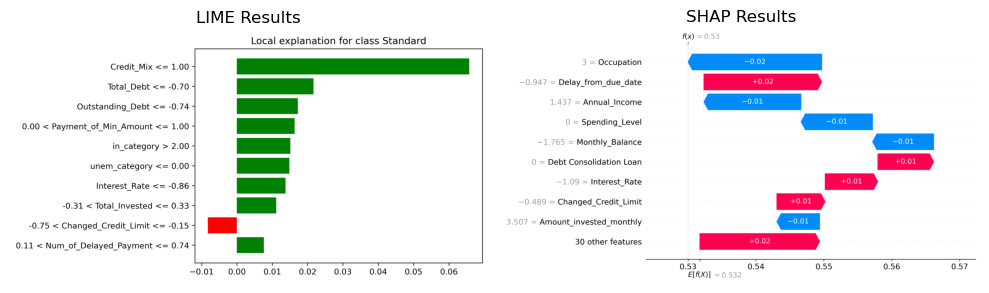

In [886]:
import os
import google.generativeai as genai
from dotenv import load_dotenv
import matplotlib.image as mpimg

load_dotenv()
api_key = os.getenv("GEMINI_API_KEY")
if not api_key:
    raise ValueError("GEMINI_API_KEY not found in environment variables.")

genai.configure(api_key=api_key)

name = input("Enter your name:")

while True:
    try:
        sample_number = int(input("Enter a number between 1 and 20000:"))
        if 1 <= sample_number <= 20000:
            break  # Exit the loop if input is valid
        else:
            print("Invalid input. Please enter a number between 1 and 20000.")
    except ValueError:
        print("Invalid input. Please enter a whole number.")

shap_text, lime_text = get_xai_results(X_test.iloc[[sample_number]],name)

# 2. Upload the file first to get the reference
file_path_dice = f'plots/{name}/{name}_dice_results.csv' 

cf_df = pd.read_csv(file_path_dice)

cf_text = cf_df.to_csv(index=False)

print("Loading Breakdown...")
print()

upload_response = upload_csv_to_gemini(file_path_dice, api_key)

# 3. Check for successful upload and then make the prompt call
if upload_response:
    # Extract the necessary file information from the upload response
    uploaded_file = upload_response['file']
    file_uri = uploaded_file['uri']
    
    # 4. Create the prompt
    # The prompt is a list containing both the text and the file pointer
    prompt_text = f"""
        You are now a credit loan assessment help bot. The creditor data has been sent the a ML model to get a classification of the credit score.
        Here are the column names and SHAP result to determine the feature importance for the classification.

        Column Names: {X_test.iloc[[sample_number]].columns.tolist()}
        SHAP Values: {shap_text}

        Here is the LIME result for the prediction
        LIME Result: {lime_text}
        Finally I have also the counterfactual explanation on the csv file that I sent you so that the customer can know how to change their credit score to good/ class 2 in the future.
        If you can't access the csv file, you can see the text here: {cf_text}
        
        I need you to explain to the customer why did they got the classification result from their model. Please explain to them based on the lime result and shap values.

        I also want you to give them some input on how they can change their classification result. Please choose the best 
        option as there are more than 1 counterfactual explanation. You group this by the value on Counterfactual # column
        You should choose the most rational explanation based on banking/financial domain knowledge. 

        You should structure the text as such (Please avoid mentioning LIME,SHAP, counterfactual explanation, and just explain it with a good flow:
        Hi {name}, Your credit score result is "Classification Result" (0: Bad, 1: Standard, 2: Good p.s. just show the string to the user instead of the encoding). 
        The reason for your classification result is ... (based on shap and lime).

        (Note: If it the result is classified as Good, you don't need to explain the counterfactual explanation, just continue to give the ending)

        EXPLAIN THE COUNTERFACTUAL EXPLANATION IF THE CREDIT IS CLASSIFIED AS BAD OR STANDARD based on the csv file that I sent. 
        Don't forget to speak in a kind tone and say thank you for applying a credit to us, hope you have a great time!
        """
    
    gemini_model = genai.GenerativeModel('gemini-1.5-flash-latest')

    
    response = gemini_model.generate_content([
        prompt_text,
        file_uri # Pass the file object directly
    ])
    

    print("\n--- Credit Scoring Result Breakdown---")
    print(response.text)

    output_file = f"plots/{name}/gemini_result.txt"
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(response.text)

    print(f"Response saved successfully to {output_file}")
    
    # Clean up the file from the server when you're done
    
    genai.delete_file(uploaded_file['name'])
    
    # Load images
    img1 = mpimg.imread(f"plots/{name}/lime_results.png")
    img2 = mpimg.imread(f"plots/{name}/shap_waterfall_plot.png")
    
    # Create figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # First image
    axes[0].imshow(img1)
    axes[0].axis('off')  # remove axes
    axes[0].set_title("LIME Results")
    
    # Second image
    axes[1].imshow(img2)
    axes[1].axis('off')
    axes[1].set_title("SHAP Results")
    
    # Adjust spacing
    plt.tight_layout()
    plt.show()